# Predict Virtual Reaction Pairs

In [1]:
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import xgboost as xgb 

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

In [ ]:
df = pd.read_csv('../data/iminium_VS.csv')
training = df[df['Type']=='training']
virtual = df[df['Type']=='virtual']

X_train = training.iloc[:,11:]
y_train = training['DDG']

X_virtual = virtual.iloc[:,11:]

In [3]:
xgbpipe = Pipeline([('scaler', StandardScaler()), ('xgb', xgb.XGBRegressor())])

xgbtrain_pred = xgbpipe.set_params(xgb__eta = 0.1,xgb__gamma = 0.0, xgb__max_depth = 3, xgb__min_child_weight = 8.102460577932023).fit(X_train, y_train).predict(X_train)
xgbtest_pred = xgbpipe.set_params(xgb__eta = 0.1,xgb__gamma = 0.0, xgb__max_depth = 3, xgb__min_child_weight = 8.102460577932023).fit(X_train, y_train).predict(X_virtual)


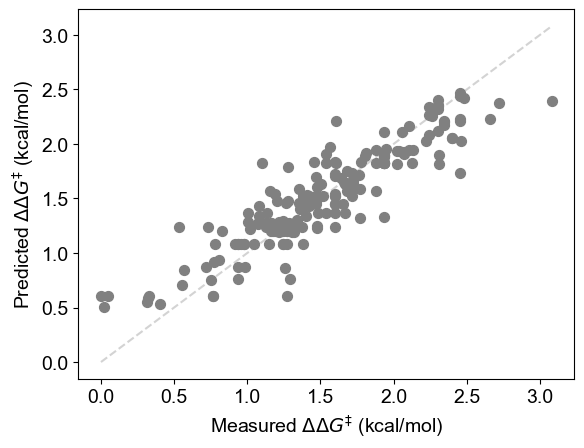

In [4]:
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], ls="--", zorder=0, color='lightgrey')
plt.scatter(y_train, xgbtrain_pred, label='Train', color='grey',  s=50)
plt.xlabel(r'Measured $\Delta \Delta G^‡$ (kcal/mol)')
plt.ylabel(r'Predicted $\Delta \Delta G^‡$ (kcal/mol)')
plt.show()

In [10]:
virtual.loc[:, 'DDG'] = xgbtest_pred
virtual = virtual.drop(columns=['Solvent', 'Co-Catalyst','Citation','ee','er','er2'])
virtual.to_csv('../results/iminium_VS_xgb.csv', index=False)